In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
import numpy as np
from numpy.polynomial import Polynomial
from sklearn.linear_model import LinearRegression

In [2]:
filename = '50_Startups.csv'

In [3]:
#https://www.kaggle.com/ashydv/sales-prediction-simple-linear-regression/data

#Don't think too much about the getDataset method. It is used for convenience
def getDataset(filename, **kwargs):
    url = f'https://github.com/IvanReznikov/mdx-msc-data-science/raw/main/datasets/{filename}'
    try:
        import os
        if filename not in os.listdir():
            !pip install wget
            import wget
            downloaded_filename = wget.download(url)
            print(f'{downloaded_filename} file downloaded')
        else:
            print(f'{filename} already exists')
        return pd.read_csv(filename, **kwargs)
        
    except Exception as e:
        print(e)
        return pd.read_csv(url, **kwargs)

In [4]:
df = getDataset(filename)

50_Startups.csv already exists


In [5]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

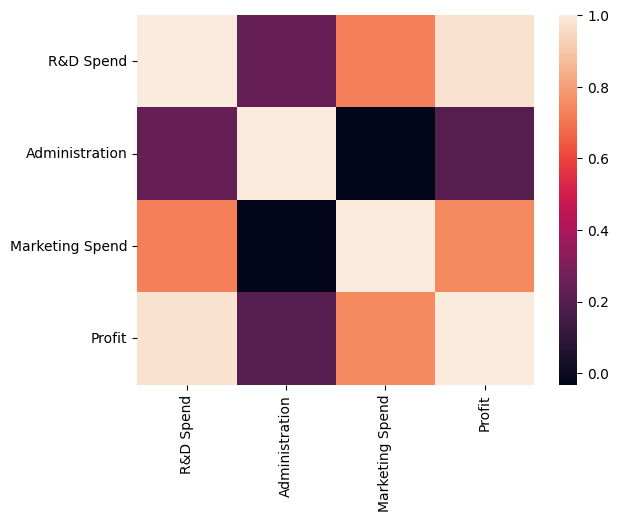

In [6]:
sns.heatmap(df.corr())
plt.show()

In [7]:
df.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

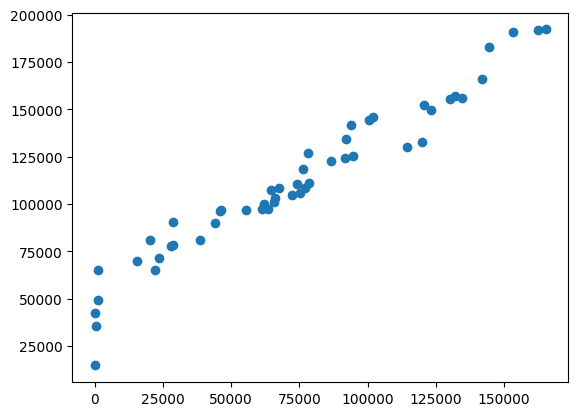

In [8]:
plt.scatter(df['R&D Spend'], df['Profit'])
plt.show()

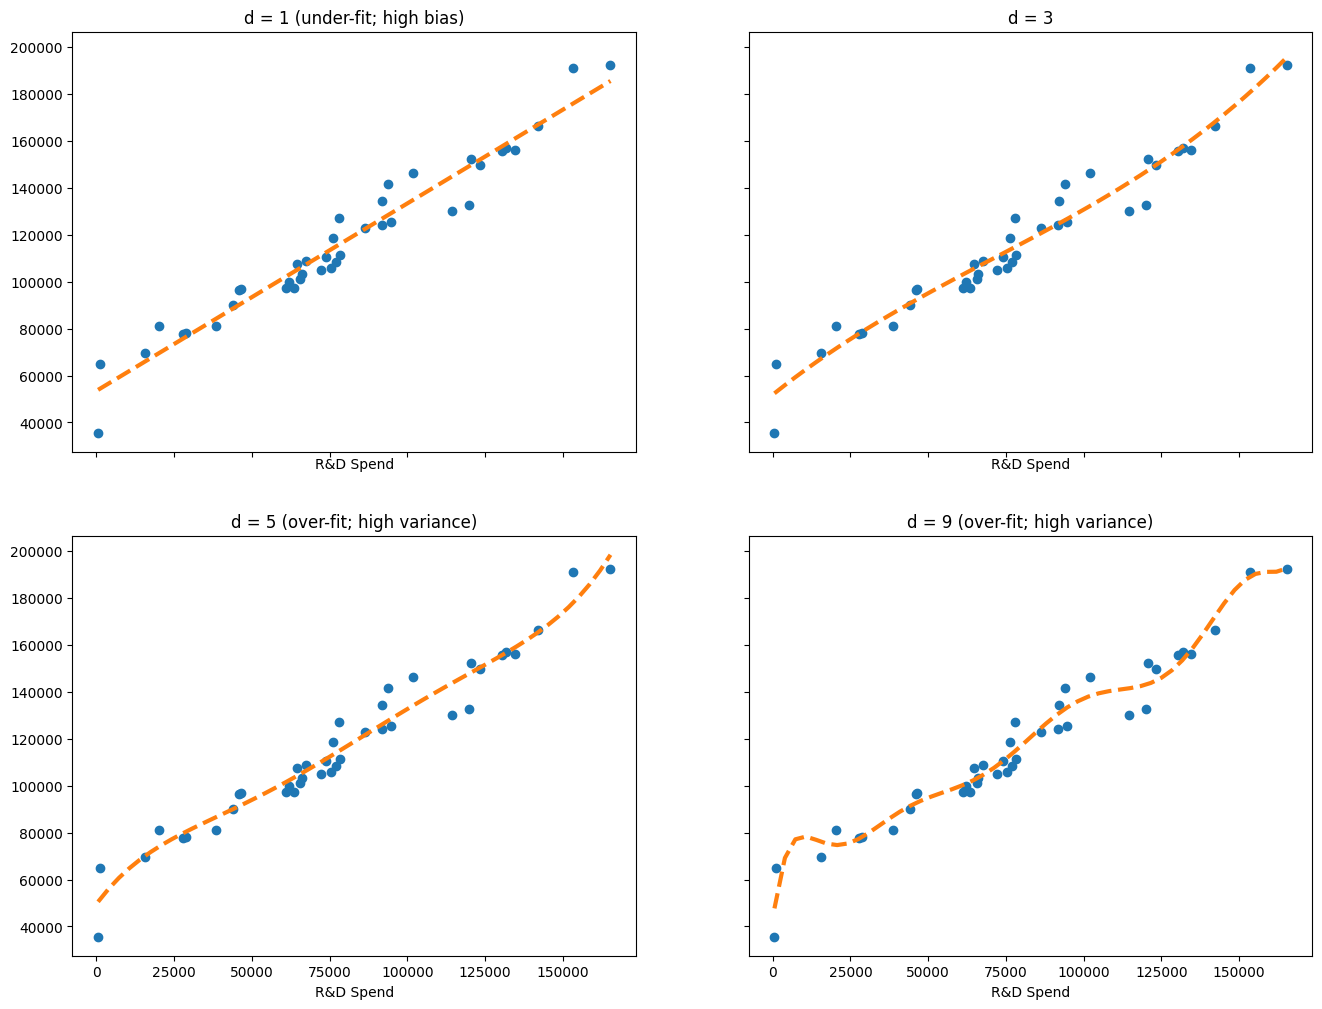

In [9]:
df = pd.read_csv('50_Startups.csv')
df = df.sample(frac=1, random_state=81).reset_index(drop=True)
p_order = [1, 3, 5, 9]
titles = ['d = {0} (under-fit; high bias)'.format(p_order[0]),
          'd = {0}'.format(p_order[1]),
          'd = {0} (over-fit; high variance)'.format(p_order[2]),
          'd = {0} (over-fit; high variance)'.format(p_order[3])]

x_label = 'R&D Spend'
y_label = 'Profit'
train_df = df.iloc[:40].sort_values(x_label)
test_df  = df.iloc[40:].sort_values(x_label)

X_train = train_df[x_label]
X_test  = test_df[x_label]
y_train = train_df[y_label]
y_test  = test_df[y_label]

f, axes = plt.subplots(2,2, figsize=(16, 12), sharex = True, sharey = True)

for i, d in enumerate(p_order):
    coefficients = np.polyfit(X_train, y_train, deg=d)
    poly = np.poly1d(coefficients)
    X_linspace = np.linspace(X_train.iloc[0], X_train.iloc[-1])
    y_linspace = poly(X_linspace)
    axes[i//2,i%2].plot(X_train, y_train, 'o', X_linspace, y_linspace, '--', linewidth=3)
    #axes[i//2,i%2].scatter(X_test, y_test, s=100, marker='o', color="red")
    axes[i//2,i%2].set_xlabel(x_label)
    axes[i//2,i%2].set_title(titles[i])
    
plt.show()

In [10]:
import statsmodels.api as sm

In [11]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [12]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     681.3
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           7.15e-26
Time:                        18:25:22   Log-Likelihood:                -414.19
No. Observations:                  40   AIC:                             832.4
Df Residuals:                      38   BIC:                             835.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.347e+04   2703.366     19.778      0.0

In [13]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

/home/ireznikov/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


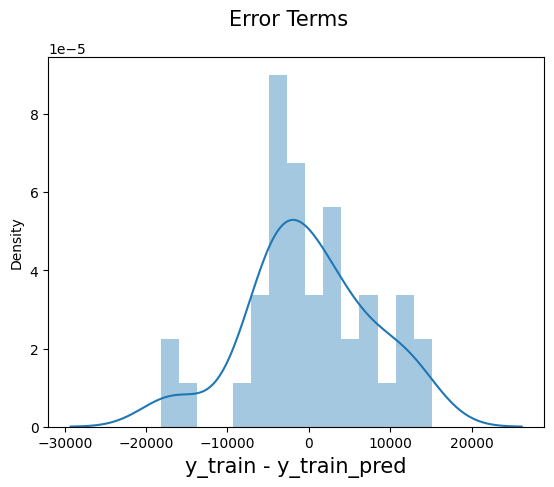

In [14]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [15]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [17]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

15084.922166640576

In [18]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9294535307623525